<a href="https://colab.research.google.com/github/vicentesarabia/ADA_informes/blob/main/Informe9_Optimal_BST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.-Problema

Entrada: Secuencia de keys de n elementos, en la cual cada keys tiene una posibilidad de ser buscada(freq).

Salida:Costo mínimo esperado en el árbol de búsqueda binaria.



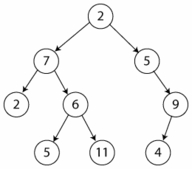

El problema que busca solucionar uno de los más conocidos es el de traducción de texto, ya que las palabras aparecen en distintas frecuencias, por lo que al optimizar la búsqueda el costo será el mínimo posible.

# 2.- Descripción del algoritmo

Para saber mejor que es un árbol de búsqueda binaria óptima primero hay que saber que es un árbol binario y la definición de estos es simple, ya que es una estructura de datos en la cual tienen nodos, los cuales pueden ser padres o hijos, los hijos son ramas del padre uno a la izquierda y otro de la derecha, esto depende de como se construya el arbol, ya que puede quedar nodos sin hijos o con un solo hijo, el caso, un árbol de búsqueda binario óptimo se sabe la frecuencia de cada clave de ser buscado, en la cual este árbol donde la búsqueda es el cote medio de buscar cada clave la cual se reduce al mínimo.

**2.1 descripción solución recursiva**

Una forma de solucionar este problema es de forma recursiva, en la cual como ya se sabe consiste en ir llamándose constantemente hasta poder solucionar el problema, se sabe que en problemas que se tienen que solucionar muchos problemas de forma recursiva no es óptimo, ya que si los problemas son muy grandes estos si van con un tiempo exponencial, el cual no es la excepción en esta solución.

Para esta solución recursiva se utiliza la siguiente fórmula:

$optcost(i,j)=\sum_{k=i}^{j} freq[k]+min_{r=1}^{j}[optcost(i,r-1)+optcost(r+1,j)]$

En la cual se necesita calcular optcost(0,n-1) para encontrar el resultado.
La fórmula funciona probando todos los nodos como raíz, en la que r varía ente i a j.

Cuando convertimos un nodo r en raíz se calcula recursivamente el costo óptimo de a r-1 y de r+1 a j.

Se agrega la suma de las frecuencias i a j como se ve en la fórmula, como se realiza esto se puede dividir en 2 partes, una la frecuencia r + la suma de las frecuencias de todos los elementos de i a j sin contar r, en la cual el término freq[r] se agrega porque va a ser raíz lo que es el nivel 1 del árbol entonces freq[r]*1=freq[r], la otra parte porque cuando tomas r como raíz todos los elementos que no sean ese se van al nivel 1 abajo de la clave calculada en el subproblema.

A continuacion la implementacion de la solucion recursiva:


In [102]:
def optCost(freq, i, j,verbose):
    global cont
    # caso base
    
    if j < i:
           
        return 0
    if j == i:
        cont+=1 
        return freq[i]
        
     
    # obtener la suma de la frecuencias [i] hasta jG
    fsum = Sum(freq, i, j)
     
  
    Min = 999999999999
     
    # considera 1 por 1 todos los elementos
    # como raiz y recursivamente busca el costo minimo
 
    for r in range(i, j + 1):
        cost = (optCost(freq, i, r - 1,verbose) +
                optCost(freq, r + 1, j,verbose))
        if cost < Min:
            Min = cost
     
    # retornar minimo costo
    return Min + fsum
 
def optimalSearchTree(keys, freq, n,verbose):
    return optCost(freq, 0, n - 1,verbose)
 

def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

cont=0
keys = [0.05,0.10,0.05,0.05,0.05,0.10]
freq = [0,0.15,0.10,0.05,0.10,0.20]
verbose=False
n = len(keys)
print("el costo optimo para el arbol binario de busqueda",
        optimalSearchTree(keys, freq, n,verbose))
print("llamadas recursivas:",cont)

el costo optimo para el arbol binario de busqueda 1.3
llamadas recursivas: 162


**2.1 Descripción solución dinámica**



Como se explicó en la anterior solución recursiva, este método de solución no es muy efectiva frente a problemas en los cuales se tiene que solucionar un problema muy grande, ya que este se va a un tiempo exponencial por lo que la mejor forma de solucionar esto es de la forma dinamica, ya que como se sabe, esta va solucionando los problemas, al mismo tiempo que almacena la solución, de esta forma cuando se tiene que solucionar un problema más grande se puede utilizar el resultado del subproblema almacenado la cual se realiza la utilización de una matriz temporal(cost), en la cual utilizamos para almacenar las soluciones de los subproblemas cost[0][n-1] mantendrá el resultado.
Lo primero es llenar todos los valores costo[i][i], luego todos los valores costo[i][i+1], luego costo[i][i+2].



In [114]:



def bottom(keys,freq,verbose):
  cost = {}
  global cont
  for i in range (len(keys)):
    cost[(i,i)]= freq[i]


  size = 1

# cost(i,j) = sum (freq of i to j) +
# min (
# cost (i+1,j) → primer nodo i como raiz,
# cost(i,i) + cost (i+2,j) → segundo nodo i+1 como raiz,
# cost(i,i+1) + cost (i+3,j) → tercer nodo i+2 como raiz,
# .
# .
# cost (i,j-1) → ultimo nodo j como raiz
# )

  while ( cost.get((0,len(keys)-1),-1) == -1):
      for i in range(len(keys)-size):
          cont+=1
          min_list =[]
          min_list.append(cost[(i+1,i+size)]) # primer nodo raiz
          if verbose==True:print("primer nodo:",min_list[0])
          min_list.append(cost[(i , i + size-1)]) # ultimo nodo siendo raiz
          if verbose==True:print("ultimo nodo:",min_list[1])
        # agregar todos los nodos intermediarios como raiz
          for k in range(i+1, i+size):
              cont+=1
              min_list.append(cost[(i , k-1)] + cost[(k+1 , i+size)])
              if verbose==True:
                print("nodos intermedios")
                print(min_list)
          cost[(i, i+size)] = sum(freq[i: i+size+1]) + min (min_list)
      size+=1

  return cost[0,len(keys)-1]
keys = [0.05,0.10,0.05,0.05,0.05,0.10]
freq = [0,0.15,0.10,0.05,0.10,0.20]
cont=0
verbose=False
print("costo minimo",bottom(keys,freq,verbose))
print("numero se subproblemas resueltos:",cont)

costo minimo 1.3
numero se subproblemas resueltos: 35


**2.3 verbose = true**

In [115]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(5)
n=len(keys)
verbose=True
print("caso optimo:",bottom(keys, p,verbose))

primer nodo: 0.10044159229130575
ultimo nodo: 0.0212590401820252
primer nodo: 0.08199208779328405
ultimo nodo: 0.10044159229130575
primer nodo: 0.05287817179939621
ultimo nodo: 0.08199208779328405
primer nodo: 0.09822897519780567
ultimo nodo: 0.05287817179939621
primer nodo: 0.26442576787787386
ultimo nodo: 0.14295967265535617
nodos intermedios
[0.26442576787787386, 0.14295967265535617, 0.10325112797530925]
primer nodo: 0.18774843139207648
ultimo nodo: 0.26442576787787386
nodos intermedios
[0.18774843139207648, 0.26442576787787386, 0.15331976409070197]
primer nodo: 0.2039853187965981
ultimo nodo: 0.18774843139207648
nodos intermedios
[0.2039853187965981, 0.18774843139207648, 0.18022106299108973]
primer nodo: 0.388631615974688
ultimo nodo: 0.3069438482419242
nodos intermedios
[0.388631615974688, 0.3069438482419242, 0.20900747157410168]
nodos intermedios
[0.388631615974688, 0.3069438482419242, 0.20900747157410168, 0.19583784445475239]
primer nodo: 0.41332029778157564
ultimo nodo: 0.38863

**2.4 visualizacion arbol**

In [119]:
def OptimalBinarySearchTree(q,p,n,e,root,w):
    #n indica la cantidad de nodos internos
    #w [i] [j] es la suma de las probabilidades de acceso del subárbol formado por los nodos internos bi a bj, incluidos los nodos hoja en ambos lados
    #e [i] [j] significa costo de búsqueda
    for i in range(n+1):
        w[i+1][i]=q[i]
        e[i+1][i]=0
    for r in range(n):#r: Número de nodos -1
        for i in range(1,n-r+1):
            j=i+r
            w[i][j]=round(w[i][j-1]+q[j]+p[j],3)
            e[i][j]=round(e[i+1][j]+w[i][j],3)
            root[i][j]=i
            
            #k significa usar diferentes elementos como nodo raíz
            for k in range(i+1,j+1):
                t=round(e[i][k-1]+e[k+1][j]+w[i][j],3)
                if t<e[i][j]:
                    e[i][j]=t
                    root[i][j]=k
    print("e")
    for i in range(1,n+2):
        print(e[i][1:])
    print('root')
    for i in range(1,n+2):
        print(root[i][1:])
    print('w')
    for i in range(1,n+2):
        print(w[i])

# Probabilidad de acceso del nodo hoja
q=[0.05,0.10,0.05,0.05,0.05,0.10]
# Probabilidad de acceso al nodo interno
p=[0,0.15,0.10,0.05,0.10,0.20]
n=len(p)-1
e,root,w=[],[],[]
for i in range(n+2):
    e.append([0]*(n+1))
    root.append([0]*(n+1))
    w.append([0]*(n+1))
OptimalBinarySearchTree(q,p,n,e,root,w)

e
[0.3, 0.7, 1.0, 1.45, 2.35]
[0, 0.25, 0.5, 0.95, 1.65]
[0, 0, 0.15, 0.45, 1.05]
[0, 0, 0, 0.2, 0.7]
[0, 0, 0, 0, 0.35]
[0, 0, 0, 0, 0]
root
[1, 1, 2, 2, 2]
[0, 2, 2, 2, 4]
[0, 0, 3, 4, 5]
[0, 0, 0, 4, 5]
[0, 0, 0, 0, 5]
[0, 0, 0, 0, 0]
w
[0.05, 0.3, 0.45, 0.55, 0.7, 1.0]
[0, 0.1, 0.25, 0.35, 0.5, 0.8]
[0, 0, 0.05, 0.15, 0.3, 0.6]
[0, 0, 0, 0.05, 0.2, 0.5]
[0, 0, 0, 0, 0.05, 0.35]
[0, 0, 0, 0, 0, 0.1]


# 3.- Correctitud

**3.1 Teorema correctitud**

El árbol de búsqueda binario óptimo debe tener un árbol para las claves ki...kj,la cual retorna el mínimo costo óptimo

**3.2 prueba teorema**

Para encontrar el árbol óptimo para claves distintas ordenadas ki....kj:
 -para cada posible raíz k(r) para i<=r<=j
 -hacer un subárbol óptimo para k(r)-1...,k(j)
 -hacer un subárbol óptimo para k(r)+1....k(j)
 -seleccionar la raiz que del mejor arbol
En la cual se utiliza la siguiente fórmula:

$e(i,j)= \begin{cases}
  0  &  \text{,if i=j+1 } \\
  min_{i\leq r\leq j}\left\{e(i,r-1)+e(r+1,j)+w(i,j) \right\} & \text{ ,if i<= j}
\end{cases}$

Caso base:

El caso base es el primer nodo $cost[(i+1,i+size)$ y el último nodo $cost[(i , i + size-1)$

Paso iterativo:

Se considera que los problemas anteriores fueron resueltos, por lo que en cualquier ciclo n-1 cost[(i, i+size)] = sum(freq[i: i+size+1]) + min (min_list) este retorna el mínimo coste de búsqueda por lo que el algoritmo es correcto.







#4.- Tiempo de ejecución

**4.1 teorema tiempo de ejecución dinámico**

El tiempo de ejecución del algoritmo de árbol de búsqueda binaria óptima de forma dinámica es de $O(n^3)$.

**4.2 prueba de teorema**

Como se puede ver en el código este utiliza 3 ciclos repetitivos, los índices de los bucles no tienen los mismos límites, pero están dentro de 1 como máximo por lo que el tiempo que toma este es de $O(n^3)$.


**4.3 Espacio adicional**

El espacio adicional que utiliza esta solución es de O(n^2), ya que este utiliza una matriz auxiliar en la cual almacena .


# 5.- Experimentos

**5.1 Experimento 1**

Para nuestro primer experimento observaremos cuál es la diferencia en el tiempo de ejecución entre la solución recursivo y la solución dinámica.

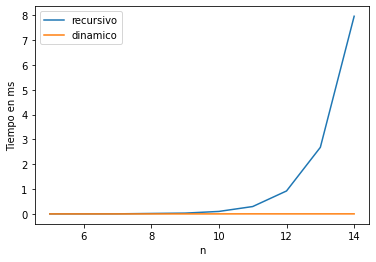

In [57]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x,y,y1 = [],[],[]
verbose=False
for n in range(5,15):

  keys, p, q = optimal_bst_instance_generator(n)
  k=len(keys)
  
  t = repeat(setup="from __main__ import optimalSearchTree", stmt=f"optimalSearchTree({keys},{p},{n},{verbose})", repeat=1, number=10)
  j = repeat(setup="from __main__ import bottom", stmt=f"bottom({keys},{p})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(j)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["recursivo","dinamico"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Observaciones y análisis**

como se puede observar el tiempo de la solución recursiva genera una curva exponencial lo cual es correcto, ya que este va a resolver muchas veces los mismos problemas por lo que a medida que el problema crece este se va exponencialmente, en cambio, la solución dinámica al almacenar los resultados estos no tienen que volver a calcular los subproblemas ya resueltos por lo que es $O(n^3)$

pd: Estaba muy dificil ):